In [23]:
## Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Eğer sns hatası da alırsanız bunu da ekleyin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    roc_auc_score, 
    precision_score, 
    recall_score
)

In [3]:
## Veri yükleme
df = pd.read_csv("emails.csv")

print(df.head())
print(df.info())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

In [12]:
## Gereksiz sütunları çıkarma
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

In [14]:
## Kelime sayılarının ölçeği farklı olabileceğinden dolayı standardizasyon yaparız
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
## Veriyi %80 Eğitim%20 Test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
## Temel model olarak lojistik regresyın kulllandık
baseline_lr = LogisticRegression(max_iter=1000)
baseline_lr.fit(X_train, y_train)
y_pred_lr = baseline_lr.predict(X_test)
y_prob_lr = baseline_lr.predict_proba(X_test)[:, 1]

In [18]:
## Iyileştirilmiş model olarak ise random forest kullandık
improved_rf = RandomForestClassifier(n_estimators=100, random_state=42)
improved_rf.fit(X_train, y_train)
y_pred_rf = improved_rf.predict(X_test)
y_prob_rf = improved_rf.predict_proba(X_test)[:, 1]

In [19]:
## Karşılaştırma
results = {
    "Baseline (Logistic Regression)": {
        "F1-Score": f1_score(y_test, y_pred_lr),
        "Precision": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "ROC AUC": roc_auc_score(y_test, y_prob_lr)
    },
    "Improved (Random Forest)": {
        "F1-Score": f1_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "ROC AUC": roc_auc_score(y_test, y_prob_rf)
    }
}

print(pd.DataFrame(results).T)

                                F1-Score  Precision    Recall   ROC AUC
Baseline (Logistic Regression)  0.944625   0.911950  0.979730  0.988379
Improved (Random Forest)        0.961214   0.959596  0.962838  0.997467


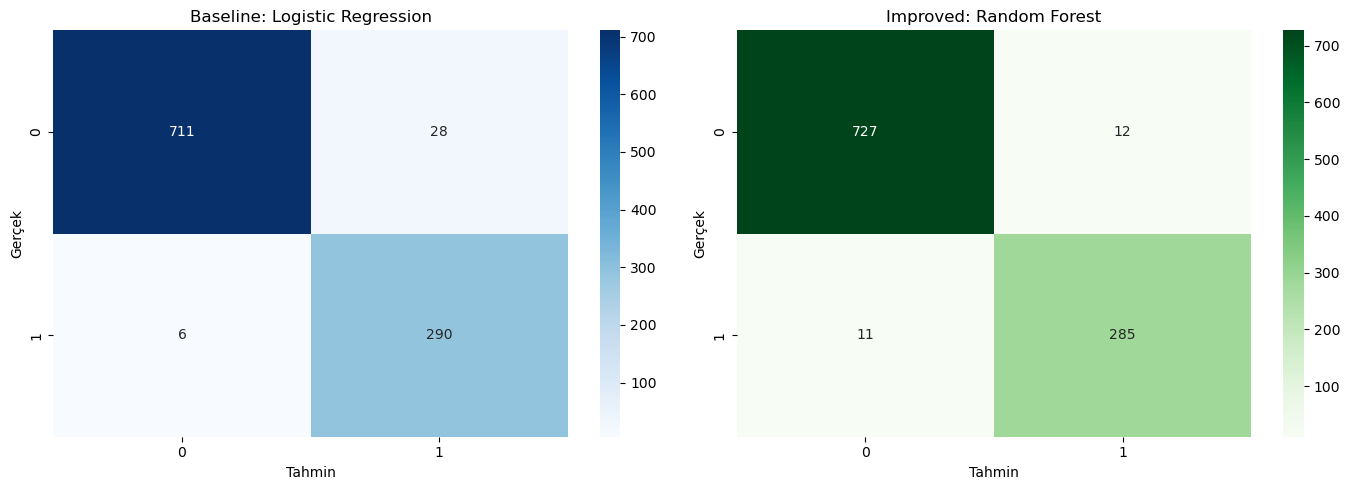

In [24]:
## Görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Baseline: Logistic Regression')
ax[0].set_xlabel('Tahmin')
ax[0].set_ylabel('Gerçek')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Improved: Random Forest')
ax[1].set_xlabel('Tahmin')
ax[1].set_ylabel('Gerçek')

plt.tight_layout()
plt.show()